In [1]:
import math
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

In [2]:
#przedział funkcji
a = -4 * math.pi
b = 3 * math.pi
#liczba punktów na wykresach i przy obliczaniu błędów
points = 1000

In [3]:
def func_plot(fn, a, b, n, label='', color='', figsize=(6, 4), subplot=None, title=''):
    if subplot is None:
        fig, ax = plt.subplots(figsize=figsize)
    else:
        ax = subplot
    xs = np.linspace(a, b, num=n)
    ys = [fn(xi) for xi in xs]
    if color:
        ax.plot(xs, ys, label=label, color=color)
    else:
        ax.plot(xs, ys, label=label)
    ax.set_xlabel('x')
    ax.set_ylabel('y')
    if label:
        ax.legend(loc="best")
    if title:
        ax.set_title(title)

In [4]:
def create_compare_errors_table(data):
    df = pd.DataFrame(data, index=["Błąd bezwzględny", "Błąd średniokwadratowy"])
    return df

In [5]:
def create_compare_errors_table_2(x, y):
     df = pd.DataFrame(x, index=y)
     return df


In [35]:
def max_absolute_error(f, W, xs, rounded=True):
    if rounded:
        return round(max([abs(f(x) - W(x)) for x in xs]),4)
    return max([abs(f(x) - W(x)) for x in xs])

In [36]:
def mse(f, W, xs, rounded=True):
    if rounded:
        return round(sum([(f(x) - W(x)) ** 2 for x in xs]) / len(xs), 4)
    return sum([(f(x) - W(x)) ** 2 for x in xs]) / len(xs)

In [8]:
def mse_approximation(xs, ys, m,w=[]):
    n = len(xs)
    if not w:
        w = [1 for _ in range(n)]
    A = np.array([[sum(w[i]*xs[i]**(j+k) for i in range(n)) for k in range(m+1)] for j in range(m+1)])
    B = np.array([sum(w[i]*ys[i]*xs[i]**j for i in range(n)) for j in range(m+1)])
    factors = np.linalg.solve(A,B)

    return lambda x: sum(factors[i]*x**i for i in range(m+1))

In [37]:
def display_approximation(f,a,b,n,ms, approximation, labels, w=[], colors=[], title=''):
    xs = np.linspace(a,b, points)
    xs_approximation = np.linspace(a,b,n)
    ys_approximation = [f(x) for x in xs_approximation]
    fig, ax = plt.subplots(figsize=(6, 4))
    func_plot(f, a, b, 1000, label="F(x)", subplot=ax)
    ax.plot(xs_approximation, ys_approximation, 'o', c="r")
    approximation_errors = {}
    while len(colors) < len(ms):
        colors.append('')
    for i in range(len(ms)):
        labels.append(f"m={ms[i]}")
    print(labels)
    for i in range(len(ms)):
        approximation_func = approximation(xs_approximation, ys_approximation, ms[i], w=w)
        func_plot(approximation_func, a, b, 1000, label=labels[i], color=colors[i],title=title, subplot=ax)
        approximation_errors[labels[i]] = [max_absolute_error(f, approximation_func ,
                                                                                              xs), mse(f,
                                                                                                             approximation_func ,xs)]
    plt.show()

    display(create_compare_errors_table(approximation_errors))


def create_error_table(approximation,ms, ns, count_mse=True, rounded=True):
    xs = np.linspace(a,b, points)
    approximation_errors = {}
    for i in range(len(ns)):
        errors = []
        for j in range(len(ms)):
            if False:
                pass
            # if ms[j] >ns[i] or ms[j]>30:
            #     errors.append(0)
            else:
                xs_approximation = np.linspace(a,b,ns[i])
                ys_approximation = [f(x) for x in xs_approximation]
                approximation_func = approximation(xs_approximation, ys_approximation, ms[j])
                if count_mse:
                    errors.append(mse(f, approximation_func ,xs, rounded=rounded))
                else:
                    errors.append(max_absolute_error(f, approximation_func, xs, rounded=rounded))
        approximation_errors[ns[i]] = errors
    for key in approximation_errors.keys():
        for i in range(len(approximation_errors[key])):
            if ms[i] <= ns[0]:
                print(approximation_errors[key][i])

    display(create_compare_errors_table_2(approximation_errors, [m for m in ms]))


In [10]:
def find_best_approximation(f,a,b,n,approximation,to, start=2,w=[]):
    xs = np.linspace(a,b, points)
    xs_approximation = np.linspace(a,b,n)
    ys_approximation = [f(x) for x in xs_approximation]
    results = []
    for i in range(start, to+1):
        approximation_func = approximation(xs_approximation, ys_approximation, i, w=w)
        error = mse(f,approximation_func ,xs)
        results.append((error, i))
    return sorted(results)


In [11]:
f = lambda x, k=4, m=1: math.exp(-k * math.sin(m * x)) + k * math.sin(m * x) - 1

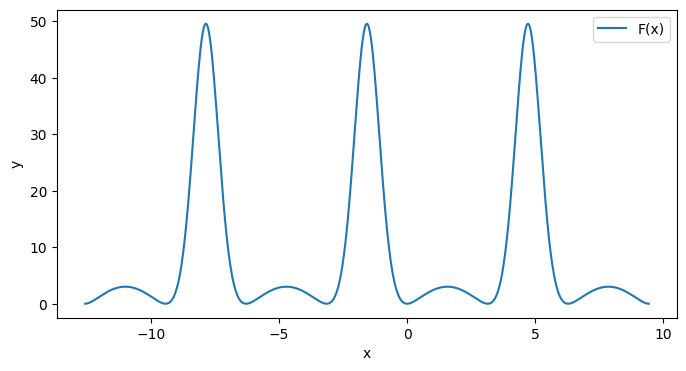

In [12]:
func_plot(f, a, b, 1000, label="F(x)", figsize=(8,4))

['m=2', 'm=3', 'm=4']


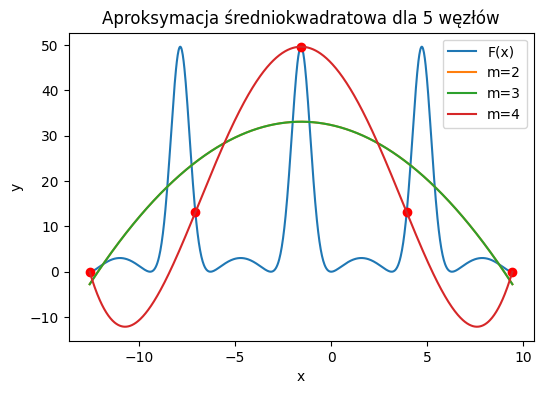

,m=2,m=3,m=4
Błąd bezwzględny,32.3592,32.3592,46.4501
Błąd średniokwadratowy,404.4590,404.4590,700.7447


In [14]:
n=5
m=[2,3,4]
display_approximation(f, a,b,n,m, mse_approximation, labels=[],title=f"Aproksymacja średniokwadratowa dla {n} węzłów"
                                                           ,
                      )

['m=5', 'm=7', 'm=10']


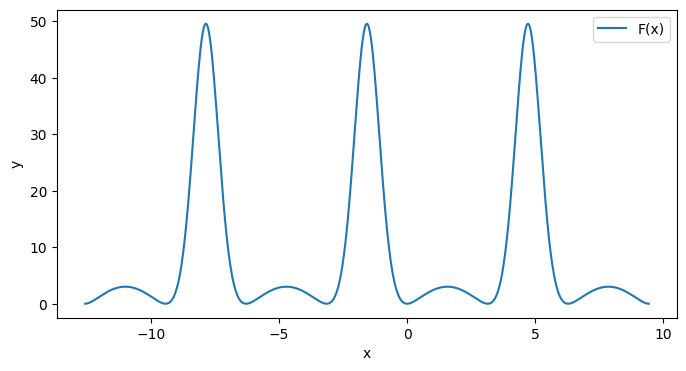

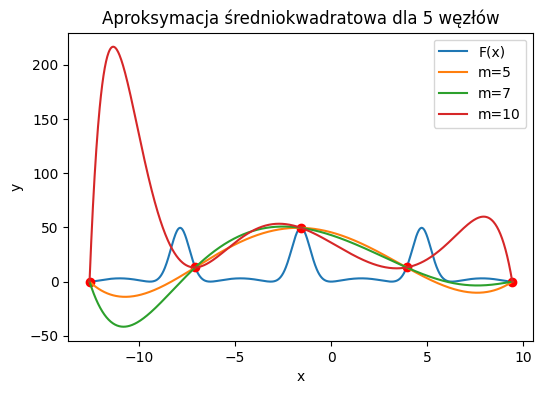

,m=5,m=7,m=10
Błąd bezwzględny,46.9381,51.1773,213.7670
Błąd średniokwadratowy,701.7484,922.5981,4889.2649


In [15]:
func_plot(f, a, b, 1000, label="F(x)", figsize=(8, 4))
n = 5
m = [5, 7, 10]
display_approximation(f, a, b, n, m, mse_approximation, labels=[],
                      title=f"Aproksymacja średniokwadratowa dla {n} węzłów"
                      ,
                      )

In [79]:
# ns = [i for i in range(10,40, 5)]
ns = [40]
ms = [3,4,5,6,10,12,15,20,25,30]
create_error_table(mse_approximation, ms, ns, count_mse=False)

40.5139
40.3478
40.3478
41.822
27.7576
22.9684
25.2947
84.0399
170.2418
597.7112


,40
3,40.5139
4,40.3478
5,40.3478
6,41.8220
10,27.7576
12,22.9684
15,25.2947
20,84.0399
25,170.2418
30,597.7112


['m=3', 'm=4']


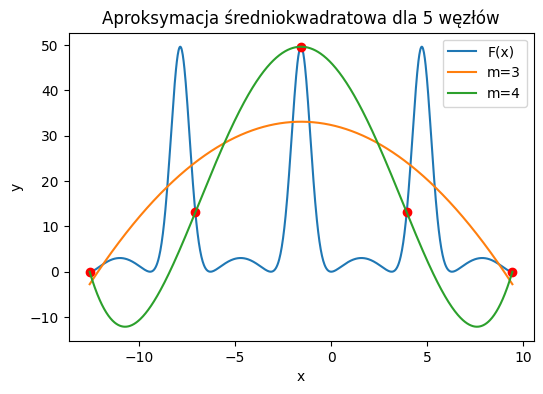

,m=3,m=4
Błąd bezwzględny,32.3592,46.4501
Błąd średniokwadratowy,404.4590,700.7447


In [16]:
n=5
m=[3,4]
display_approximation(f, a,b,n,m, mse_approximation, labels=[],title=f"Aproksymacja średniokwadratowa dla {n} węzłów"
                                                           ,
                      )

['m=4', 'm=5', 'm=6']


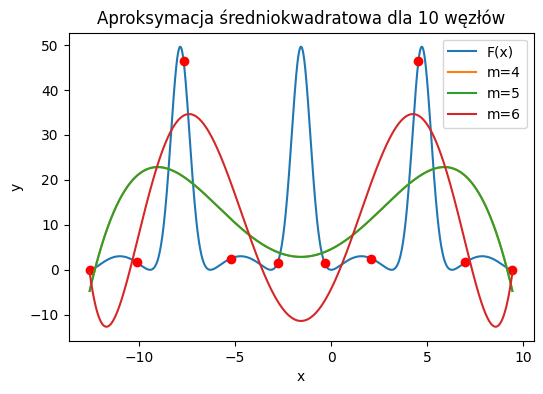

,m=4,m=5,m=6
Błąd bezwzględny,46.7139,46.7139,60.9568
Błąd średniokwadratowy,244.0448,244.0448,371.5003


In [23]:
n=10
m=[4,5,6]
display_approximation(f, a,b,n,m, mse_approximation, labels=[],title=f"Aproksymacja średniokwadratowa dla {n} węzłów"
                                                           ,
                      )

['m=4', 'm=5', 'm=6']


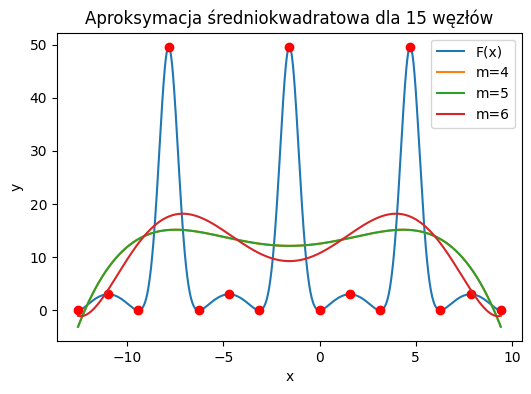

,m=4,m=5,m=6
Błąd bezwzględny,37.4535,37.4535,40.3216
Błąd średniokwadratowy,197.4434,197.4434,197.1768


In [22]:
n=15
m=[4,5,6]
display_approximation(f, a,b,n,m, mse_approximation, labels=[],title=f"Aproksymacja średniokwadratowa dla {n} węzłów"
                                                           ,
                      )


['m=20', 'm=44']


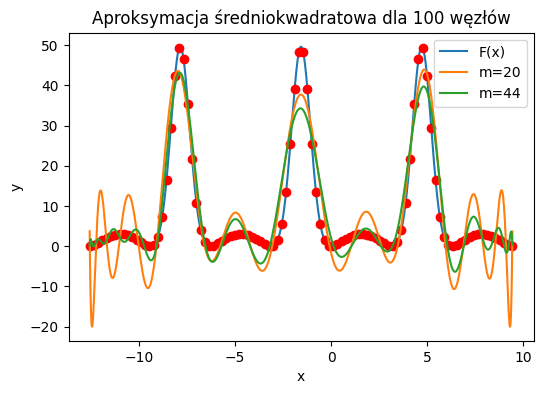

,m=20,m=44
Błąd bezwzględny,20.1340,15.3481
Błąd średniokwadratowy,43.2462,21.6663


In [28]:
n=100
m=[20,44]
display_approximation(f, a,b,n,m, mse_approximation, labels=[],title=f"Aproksymacja średniokwadratowa dla {n} węzłów"
                                                           ,
                      )

['m=20', 'm=44']


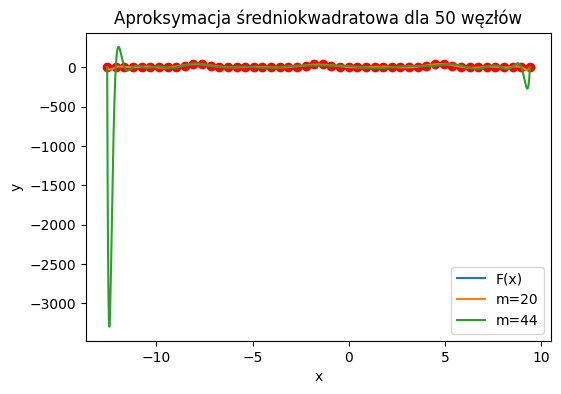

,m=20,m=44
Błąd bezwzględny,34.2337,3298.7231
Błąd średniokwadratowy,46.7551,89991.1572


In [29]:
n=50
m=[20, 44]
display_approximation(f, a,b,n,m, mse_approximation, labels=[],title=f"Aproksymacja średniokwadratowa dla {n} węzłów"
                                                           ,
                      )

In [17]:
print(find_best_approximation(f, a,b,50, mse_approximation, 100))

[(46.7551, 20), (51.5987, 21), (73.1652, 25), (74.5707, 18), (74.5919, 19), (77.7591, 22), (81.0821, 16), (81.0821, 17), (83.827, 14), (83.827, 15), (85.3122, 23), (86.9248, 12), (86.9248, 13), (103.6751, 10), (103.6751, 11), (112.4501, 27), (124.639, 24), (167.091, 8), (167.091, 9), (174.1828, 26), (188.5264, 6), (188.5264, 7), (189.6908, 4), (189.6908, 5), (197.9001, 2), (197.9001, 3), (376.5725, 32), (431.2368, 28), (575.8914, 29), (690.8894, 50), (735.1529, 39), (1116.4094, 30), (1466.5504, 38), (2092.7474, 33), (2208.3732, 31), (2388.7684, 37), (6103.8147, 46), (8087.4407, 36), (11544.1917, 40), (12708.6886, 34), (14297.5727, 35), (19755.5901, 42), (20606.4188, 48), (23798.9536, 45), (24220.0477, 51), (33506.2609, 70), (36279.1416, 58), (81234.2891, 43), (81312.7501, 53), (83553.8934, 41), (89991.1572, 44), (101896.6354, 49), (114278.8329, 59), (141154.9245, 67), (471184.4608, 55), (565558.4773, 52), (995872.1759, 47), (1401073.1399, 87), (1793182.7471, 56), (1855240.291, 61), (31

['m=10', 'm=25']


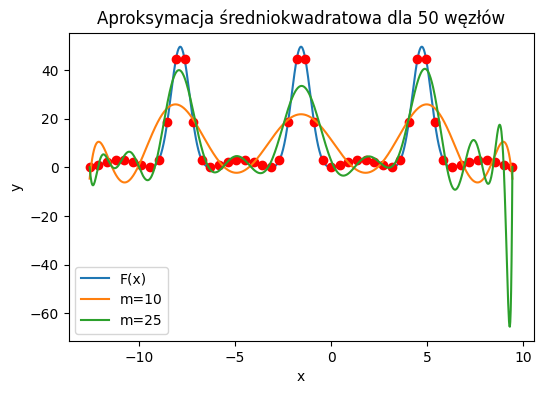

,m=10,m=25
Błąd bezwzględny,27.7681,65.6983
Błąd średniokwadratowy,103.6751,73.1652


In [18]:
n=50
m=[10, 25]
display_approximation(f, a,b,n,m, mse_approximation, labels=[],title=f"Aproksymacja średniokwadratowa dla {n} węzłów"
                                                           ,
                      )

['m=26', 'm=27', 'm=28']


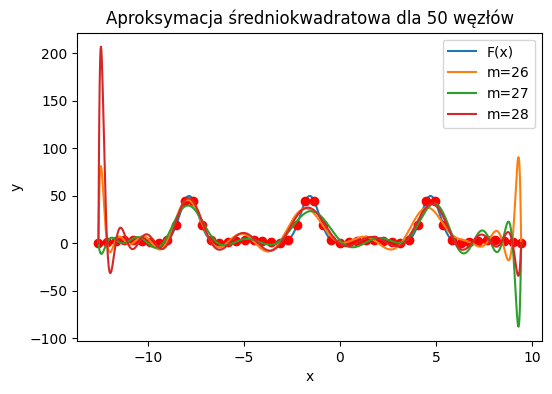

,m=26,m=27,m=28
Błąd bezwzględny,90.2249,88.2251,206.5908
Błąd średniokwadratowy,174.1828,112.4501,431.2368


In [19]:
n=50
m=[26, 27, 28]
display_approximation(f, a,b,n,m, mse_approximation, labels=[],title=f"Aproksymacja średniokwadratowa dla {n} węzłów"
                                                           ,
                      )

In [21]:
print(find_best_approximation(f, a,b,100, mse_approximation, 60))

[(21.6663, 44), (21.7671, 38), (22.1931, 50), (22.9246, 33), (23.8172, 30), (24.6162, 36), (24.911, 26), (25.3504, 34), (27.4121, 46), (27.7424, 28), (27.9503, 37), (28.423, 47), (29.7905, 48), (30.4453, 39), (36.0475, 58), (40.9015, 25), (42.1478, 52), (43.2462, 20), (43.7822, 43), (45.0122, 27), (45.4178, 21), (47.9454, 45), (57.4339, 60), (61.5712, 54), (62.0213, 22), (63.3137, 55), (65.8086, 53), (69.3835, 18), (69.384, 19), (71.0551, 24), (72.0448, 23), (81.0723, 16), (81.0723, 17), (83.4626, 14), (83.4626, 15), (86.9224, 12), (86.9224, 13), (102.0089, 10), (102.0089, 11), (112.3996, 29), (119.5, 56), (120.0765, 32), (122.2044, 51), (125.2375, 57), (142.6428, 41), (144.875, 31), (165.641, 8), (165.641, 9), (175.194, 42), (188.5077, 6), (188.5077, 7), (189.5772, 4), (189.5772, 5), (197.8906, 2), (197.8906, 3), (321.692, 59), (438.3851, 49), (1062.01, 35), (4518.6417, 40)]


['m=3', 'm=5']


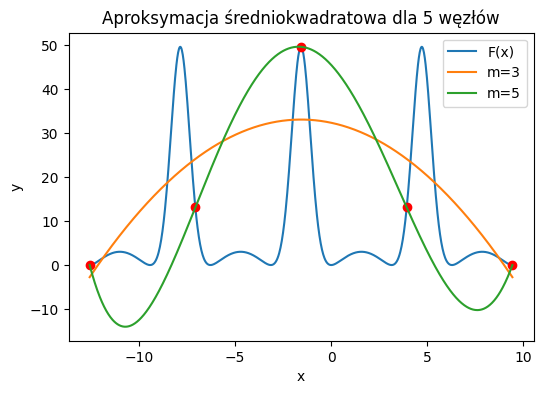

,m=3,m=5
Błąd bezwzględny,32.3592,46.9381
Błąd średniokwadratowy,404.4590,701.7484


In [47]:
n=5
m=[3, 5]
display_approximation(f, a,b,n,m, mse_approximation, labels=[],title=f"Aproksymacja średniokwadratowa dla {n} węzłów"
                                                           ,
                      )

['m=3', 'm=5']


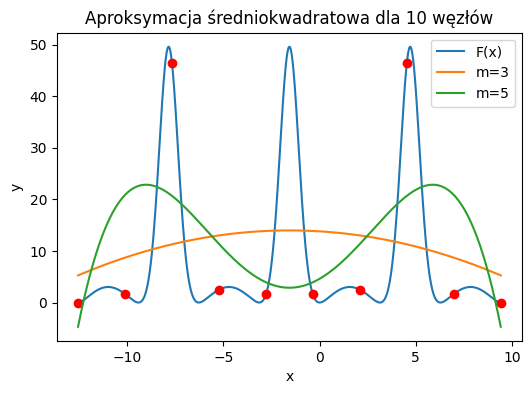

,m=3,m=5
Błąd bezwzględny,38.4652,46.7139
Błąd średniokwadratowy,201.9546,244.0448


In [48]:
n=10
m=[3,5]
display_approximation(f, a,b,n,m, mse_approximation, labels=[],title=f"Aproksymacja średniokwadratowa dla {n} węzłów"
                                                           ,
                      )

['m=3', 'm=5']


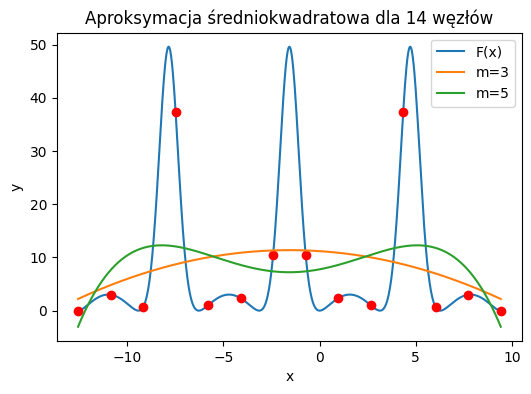

,m=3,m=5
Błąd bezwzględny,41.2264,42.3687
Błąd średniokwadratowy,198.4789,191.5102


In [56]:
n=14
m=[3,5]
display_approximation(f, a,b,n,m, mse_approximation, labels=[],title=f"Aproksymacja średniokwadratowa dla {n} węzłów"
                                                           ,
                      )

['m=3', 'm=5']


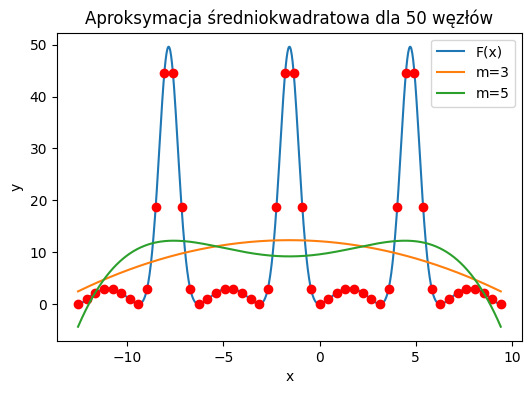

,m=3,m=5
Błąd bezwzględny,40.5043,40.3928
Błąd średniokwadratowy,197.9001,189.6908


In [52]:
n=50
m=[3,5]
display_approximation(f, a,b,n,m, mse_approximation, labels=[],title=f"Aproksymacja średniokwadratowa dla {n} węzłów"
                                                           ,
                      )

['m=2', 'm=3', 'm=4', 'm=5', 'm=6', 'm=7', 'm=8']


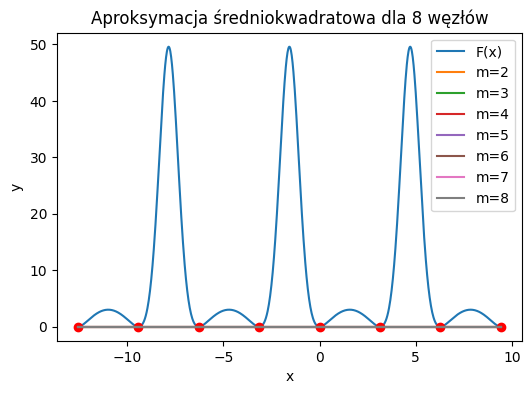

,m=2,m=3,m=4,m=5,m=6,m=7,m=8
Błąd bezwzględny,49.5979,49.5979,49.5979,49.5979,49.5979,49.5979,49.5979
Błąd średniokwadratowy,288.1865,288.1865,288.1865,288.1865,288.1865,288.1865,288.1865


In [60]:
n=8
m=[2,3,4,5,6,7, 8]
display_approximation(f, a,b,n,m, mse_approximation, labels=[],title=f"Aproksymacja średniokwadratowa dla {n} węzłów"
                                                           ,
                      )

['m=6', 'm=8', 'm=10']


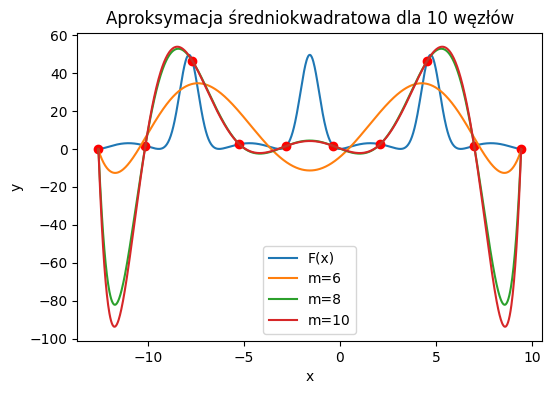

,m=6,m=8,m=10
Błąd bezwzględny,60.9568,84.2822,95.8082
Błąd średniokwadratowy,371.5003,1096.8456,1326.3513


In [62]:
n=10
m=[6, 8, 10]
display_approximation(f, a,b,n,m, mse_approximation, labels=[],title=f"Aproksymacja średniokwadratowa dla {n} węzłów"
                                                           ,
                      )

['m=6', 'm=8', 'm=10']


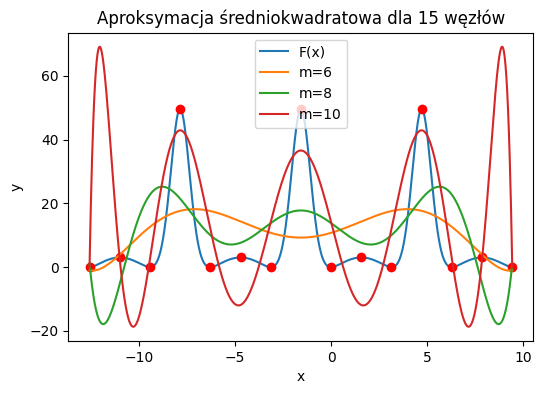

,m=6,m=8,m=10
Błąd bezwzględny,40.3216,31.8148,67.9799
Błąd średniokwadratowy,197.1768,197.9781,457.4556


In [85]:
n=15
m=[6, 8, 10]
display_approximation(f, a,b,n,m, mse_approximation, labels=[],title=f"Aproksymacja średniokwadratowa dla {n} węzłów"
                                                           ,
                      )

['m=6', 'm=8', 'm=10']


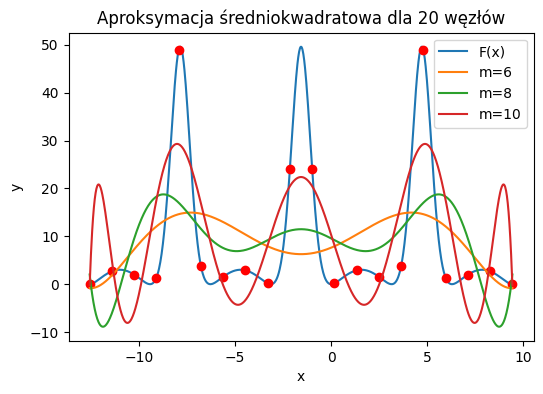

,m=6,m=8,m=10
Błąd bezwzględny,43.3133,38.1019,27.2027
Błąd średniokwadratowy,189.3974,171.3383,116.9346


In [84]:
n=20
m=[6, 8, 10]
display_approximation(f, a,b,n,m, mse_approximation, labels=[],title=f"Aproksymacja średniokwadratowa dla {n} węzłów"
                                                           ,
                      )

['m=6', 'm=8', 'm=10']


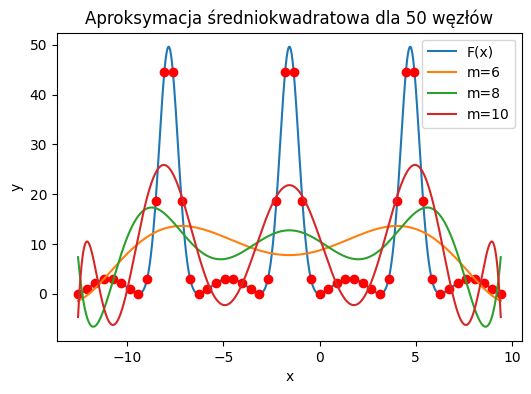

,m=6,m=8,m=10
Błąd bezwzględny,41.8089,36.8325,27.7681
Błąd średniokwadratowy,188.5264,167.0910,103.6751


In [83]:
n=50
m=[6, 8, 10]
display_approximation(f, a,b,n,m, mse_approximation, labels=[],title=f"Aproksymacja średniokwadratowa dla {n} węzłów"
                                                           ,
                      )

In [91]:
print(find_best_approximation(f, a,b,50, mse_approximation, 50))

[(46.7551, 20), (51.5987, 21), (73.1652, 25), (74.5707, 18), (74.5919, 19), (77.7591, 22), (81.0821, 16), (81.0821, 17), (83.827, 14), (83.827, 15), (85.3122, 23), (86.9248, 12), (86.9248, 13), (103.6751, 10), (103.6751, 11), (112.4501, 27), (124.639, 24), (167.091, 8), (167.091, 9), (174.1828, 26), (188.5264, 6), (188.5264, 7), (189.6908, 4), (189.6908, 5), (197.9001, 2), (197.9001, 3), (376.5725, 32), (431.2368, 28), (575.8914, 29), (690.8894, 50), (735.1529, 39), (1116.4094, 30), (1466.5504, 38), (2092.7474, 33), (2208.3732, 31), (2388.7684, 37), (6103.8147, 46), (8087.4407, 36), (11544.1917, 40), (12708.6886, 34), (14297.5727, 35), (19755.5901, 42), (20606.4188, 48), (23798.9536, 45), (81234.2891, 43), (83553.8934, 41), (89991.1572, 44), (101896.6354, 49), (995872.1759, 47)]


['m=20']


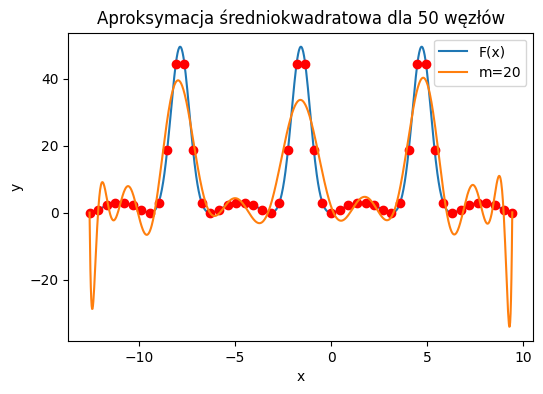

,m=20
Błąd bezwzględny,34.2337
Błąd średniokwadratowy,46.7551


In [98]:
n=50
m=[20]
display_approximation(f, a,b,n,m, mse_approximation, labels=[],title=f"Aproksymacja średniokwadratowa dla {n} węzłów"
                                                           ,
                      )

In [99]:
print(find_best_approximation(f, a,b,100, mse_approximation, 70))

[(21.6663, 44), (21.7671, 38), (22.1931, 50), (22.9246, 33), (23.8172, 30), (24.6162, 36), (24.911, 26), (25.3504, 34), (27.4121, 46), (27.7424, 28), (27.9503, 37), (28.423, 47), (29.7905, 48), (30.4453, 39), (34.1159, 70), (36.0475, 58), (39.399, 64), (40.9015, 25), (42.1478, 52), (43.2462, 20), (43.7822, 43), (45.0122, 27), (45.4178, 21), (45.9869, 61), (47.9454, 45), (53.9591, 69), (57.4339, 60), (60.9998, 63), (61.5712, 54), (62.0213, 22), (63.3137, 55), (65.8086, 53), (69.3835, 18), (69.384, 19), (71.0551, 24), (72.0448, 23), (81.0723, 16), (81.0723, 17), (83.4626, 14), (83.4626, 15), (86.9224, 12), (86.9224, 13), (102.0089, 10), (102.0089, 11), (112.3996, 29), (119.5, 56), (120.0765, 32), (122.2044, 51), (125.2375, 57), (142.6428, 41), (144.875, 31), (157.1252, 65), (165.641, 8), (165.641, 9), (175.194, 42), (188.5077, 6), (188.5077, 7), (189.5772, 4), (189.5772, 5), (197.8906, 2), (197.8906, 3), (321.692, 59), (332.4105, 62), (350.5067, 66), (438.3851, 49), (1062.01, 35), (1692.

['m=44']


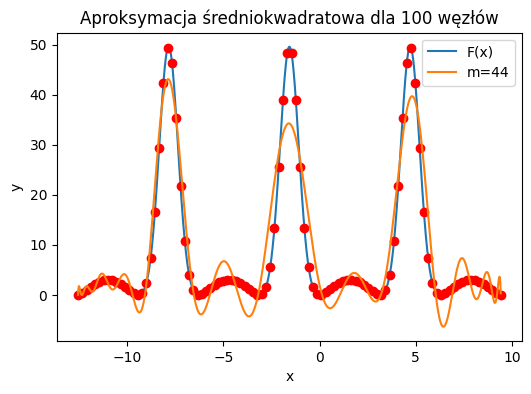

,m=44
Błąd bezwzględny,15.3481
Błąd średniokwadratowy,21.6663


In [102]:
n=100
m=[44]
display_approximation(f, a,b,n,m, mse_approximation, labels=[],title=f"Aproksymacja średniokwadratowa dla {n} węzłów"
                                                           ,
                      )

In [106]:
print(find_best_approximation(f, a,b,500, mse_approximation, 70, start=50))

[(22.8216, 59), (26.7875, 52), (28.1836, 60), (28.3599, 58), (29.5434, 53), (32.6011, 62), (32.7591, 67), (33.3824, 69), (33.7309, 54), (35.2786, 63), (35.5933, 64), (36.5725, 51), (39.4284, 55), (53.5767, 50), (64.1698, 70), (95.4821, 57), (138.4742, 66), (246.7847, 56), (498.1677, 68), (543.8315, 65), (37705.7173, 61)]


[(21.6663, 44), (21.7671, 38), (22.1931, 50), (22.9246, 33), (23.8172, 30), (24.6162, 36), (24.911, 26), (25.3504, 34), (27.4121, 46), (27.7424, 28), (27.9503, 37), (28.423, 47), (29.7905, 48), (30.4453, 39), (34.1159, 70), (36.0475, 58), (39.399, 64), (40.9015, 25), (42.1478, 52), (43.2462, 20), (43.7822, 43), (45.0122, 27), (45.4178, 21), (45.9869, 61), (47.9454, 45), (53.9591, 69), (57.4339, 60), (60.9998, 63), (61.5712, 54), (62.0213, 22), (63.3137, 55), (65.8086, 53), (69.3835, 18), (69.384, 19), (71.0551, 24), (72.0448, 23), (81.0723, 16), (81.0723, 17), (83.4626, 14), (83.4626, 15), (86.9224, 12), (86.9224, 13), (102.0089, 10), (102.0089, 11), (112.3996, 29), (119.5, 56), (120.0765, 32), (122.2044, 51), (125.2375, 57), (142.6428, 41), (144.875, 31), (157.1252, 65), (165.641, 8), (165.641, 9), (175.194, 42), (188.5077, 6), (188.5077, 7), (189.5772, 4), (189.5772, 5), (197.8906, 2), (197.8906, 3), (321.692, 59), (332.4105, 62), (350.5067, 66), (438.3851, 49), (1062.01, 35), (1692.

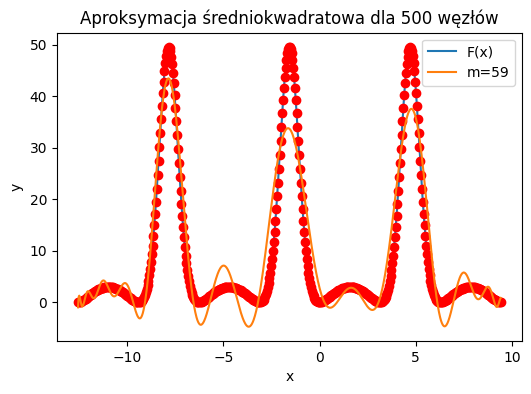

,m=59
Błąd bezwzględny,15.9349
Błąd średniokwadratowy,22.8216


In [107]:
print(find_best_approximation(f, a, b, 100, mse_approximation, 70))
n = 500
m = [59]
display_approximation(f, a, b, n, m, mse_approximation, labels=[],
                      title=f"Aproksymacja średniokwadratowa dla {n} węzłów"
                      ,
                      )

In [51]:
ns = [15,20,25,30,35,40]
ms = [11,13]
create_error_table(mse_approximation,ms, ns, count_mse=False, rounded=True)

67.9799
175.3113
27.2027
24.8648
26.8146
22.5082
27.5917
22.9788
27.7002
22.9434
27.7576
22.9684


,15,20,25,30,35,40
11,67.9799,27.2027,26.8146,27.5917,27.7002,27.7576
13,175.3113,24.8648,22.5082,22.9788,22.9434,22.9684


['m=20']


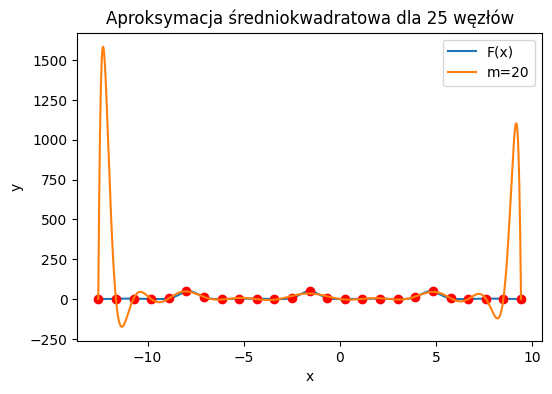

,m=20
Błąd bezwzględny,1584.7157
Błąd średniokwadratowy,65978.0562


In [44]:

n = 25
m = [20]
display_approximation(f, a, b, n, m, mse_approximation, labels=[],
                      title=f"Aproksymacja średniokwadratowa dla {n} węzłów"
                      ,
                      )

['m=25']


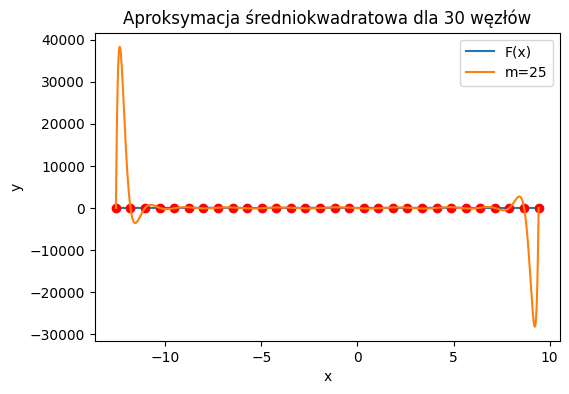

,m=25
Błąd bezwzględny,3.835270e+04
Błąd średniokwadratowy,3.232128e+07


In [46]:

n = 30
m = [25]
display_approximation(f, a, b, n, m, mse_approximation, labels=[],
                      title=f"Aproksymacja średniokwadratowa dla {n} węzłów"
                      ,
                      )